<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/9_3_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%81%D0%BB%D0%BE%D0%B9%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D0%B5%D1%80%D1%81%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD%D0%B0_%D0%B2_TensorFlow_(%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Краткая история нейронных сетей. Знакомство с многослойным персептроном](https://colab.research.google.com/drive/1-FEYLgNSN5kJyAOoaW9dOhDUABU8VJlc)
2. [Математический аппарат обучения нейронных сетей](https://colab.research.google.com/drive/1FtyyBXYq9FaOEknvu4ghim-ejuO_3aIZ)
3. Обучение многослойного персептрона в TensorFlow (Практика)
4. [Домашняя работа](https://colab.research.google.com/drive/1bSAFxhE4EAEBkSDUABYwbOMK0FqwimqX)

Нейронную сеть можно представить в виде абстрактного направленного графа, вершинами которого будут математические операции и точки входа и выхода для данных и переменных. Именно эту идею успешно подхватили и успешно воплотили в код сразу несколько групп исследователей. Первой успешной библиотекой для автоматического дифференцирования, которая на долгие годы определила ландшафт глубокого обучения в мире и во многом продолжает его определять и сейчас, стала библиотека **Theano**. Однако в 2015 году Google анонсировала выход своей собственной библиотеки **TensorFlow** с открытым исходным кодом. На сегодняшний день библиотека Theano считается устаревшей и мы ее не будем рассматривать. Что касается TensorFlow, то он набирает обороты в популярности среди разработчиков. Что в основном связано с надежностью среды и относительной простотой использования пакета.

В целом до 2017 года существовало большое количество и других библиотек, каждая из которых занимала узкую нишу в своей экоситеме: Caffe, Chainer, DyNet, Torch (основанный на Lua предшественник PyTorch), MXNet, CNTK, DL4J и др. Активно развивались высокоуровневые обертки над Theano и TensorFlow: Lasagne и Keras.

C выпуском **PyTorch 0.1** в январе 2017 года произошел переход от взрывного роста количества библиотек, адаптеров и форматов обмена данными к эпохе объединения и унификации.  

Разработчики объединились вокруг либо PyTorch, либо TensorFlow, а другие библиотеки стали использоваться реже, за исключением, так называемых нишевых, для узкого круга задач.

Далее развитие передовых фреймворков пошло по пути:
* активная разработка Theano, одного из первых фреймворков глубокого обучения, фактически прекратилась;
* TensorFlow полностью поглотил Keras, превратив последний в полноценный API;
* TensorFlow предоставил режим немедленного выполнения, в чем-то напоминающий
подход PyTorch к вычислениям;
* TensorFlow выпустил TF 2.0, в котором режим немедленного выполнения использовался по умолчанию, а также появились динамические графы;
* разработанная компанией Google независимо от TensorFlow библиотека JAX
начала укреплять позиции как эквивалент NumPy, только с поддержкой GPU,
автоматического вычисления градиентов и JIT;
* PyTorch поглотил Caffe2 в качестве прикладной части;
* PyTorch заменил большинство низкоуровневого кода, унаследованного из основанного на Lua проекта Torch;
* PyTorch добавил среду отложенного выполнения (graph mode) TorchScript.

И так, наблюдая тенденцию развития фреймворков для глубоко обучения, мы видим, что для дальнейшего обучения и трудоустройства наиболее перспективными кажутся TensorFlow с его удобной оберткой Keras и PyTorch.

С инструментами определились. Вернёмся к практике. Рассмотрим многослойный персептрон из теоретической части данного урока с точки зрения низкоуровневого TensorFlow. В качестве задачи для нашего персептрона мы возьмем классическую задачу распознавания рукописных цифр.

**ВАЖНО**. Вы используете низкоуровневый TensorFlow, поэтому важно сменить среду выполнения на GPU (например, T4). Как это сделать смотри 1 урок. Иначе будут возникать ошибки в самых неожиданных местах.

## Многослойные персептрон (MLP)

Кам мы помним из практики уравнение персептрона выглядит следующим образом:

$$y = \vec{w}⋅\mathrm{X} + b$$

где

* $y$ - вывод перцептрона
* $\mathrm{X}$ - матрица признаков
* $\vec{w}$ - вектор весов
* $b$ - смещение

Когда эти персептроны складываются, они образуют структуры, называемые полносвязанных (плотными) слоями, которые затем могут быть соединены для построения нейронной сети. Уравнение плотного слоя аналогично уравнению персептрона, но вместо этого использует матрицу весов и вектор смещения:

$$y = \mathrm{W}⋅\mathrm{X} + \vec{b}$$

где

* $y$ - вывод полносвязного (плотного) слоя
* $\mathrm{X}$ - матрица признаков
* $\mathrm{W}$ - матрица весов
* $\vec{b}$ - вектор смещения


В MLP несколько полносвязанных (плотных) слоев соединены таким образом, что выходы одного слоя полностью подключены к входам следующего слоя. Добавление нелинейных функций активации к выходным данным полносвязанных слоев может помочь классификатору MLP изучить границы принятия сложных решений и хорошо обобщить "невидимые" данные.

## Импортируем нужные библиотеки

In [ ]:
# Устанавливаем Seaborn для построения графиков
!pip install -q seaborn

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import tempfile
import os
# Установим по умолчанию размер фигуры для Matplotlib по умолчанию.
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

## Загрузка данных

Разделим набор данных MNIST на обучающий, валидационный и тестовый наборы. На обучающем наборе мы обучаем модель. Валидационный набор можно использовать для оценки обобщаемости модели во время обучения, чтобы тестовый набор мог служить окончательной непредвзятой оценкой производительности модели. На эту тему у нас будет отдельный урок, пока примем как данность, что выборку принято делить на обучающую, валидационную и тестовую.


In [ ]:
train_data, val_data, test_data = tfds.load("mnist",
                                            split=['train[10000:]', 'train[0:10000]', 'test'],
                                            batch_size=128, as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Функция **load** загружает предустановленные наборы данных по их имени. Параметр *split* - показывает как нам необходимо разбить (расщепить) выборку. Набор MNIST содержит две выборки `train` и `test`. В *split* мы передаем в списке правила как нам разбить выборку. В данном случае функция вернет кортеж (`as_supervised=True` - параметр определяет, что вернуть данные как кортеж) из трех выборок:

* обучающая выборка - от 10000 до конца обучающей выборки MNIST
* валидационная (проверочная) выборка - первые 10000 из обучающей выборки MNIST
* тестовая выборка - тестовая выборка в MNIST  

Параметр `batch_size` делит весь набор на пакеты. В случае `batch_size=-1` разделение на пакеты не происходит.

Градиентный спуск эффективен в задачах машинного обучения с использованием больших наборов обучающих данных. Однако при очень большом объеме обучающих данных градиентный спуск может не выполниться из-за невозможности поместить все данные в оперативную память (ОЗУ) компьютера.

В память компьютера можно втиснуть относительно большой набор данных, но если попытаться обучить нейронную сеть с миллионами параметров на этих данных,
классический градиентный спуск окажется крайне неэффективным из-за вычислительной сложности обработки большого объема многомерных данных.
К счастью, проблема ограниченной памяти и вычислительной мощности имеет решение: стохастический вариант градиентного спуска (Stochastic Gradient Descent, SGD). При использовании этого варианта обучающие данные разбиваются на пакеты — небольшие подмножества полного обучающего набора данных, чтобы сделать
градиентный спуск управляемым и продуктивным. Вот здесь нам и нужно делить все наши данные на пакеты или батчи, что одно и тоже.

Набор данных MNIST состоит из написанных от руки цифр и соответствующих им меток значений. Визуализируем примеры:

Размерность исходных данных: (1500, 28, 28, 1)
Размерность данных после сжатия: (1500, 28, 28)


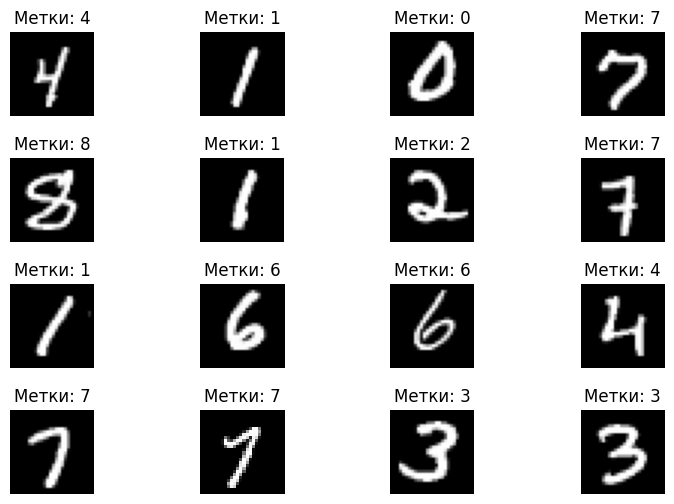

In [ ]:
x_viz, y_viz = tfds.load("mnist", split=['train[:1500]'], batch_size=-1, as_supervised=True)[0] # Взять все одним батчем и выбрать его для визуализации
print('Размерность исходных данных:', x_viz.shape)
x_viz = tf.squeeze(x_viz, axis=3) # метод сжатия размерности, исключаем данные по оси с индексом 3
print('Размерность данных после сжатия:', x_viz.shape)

for i in range(16): # Выводим 16 картинок из датасета
    plt.subplot(4,4,1+i)
    plt.axis('off')
    plt.imshow(x_viz[i], cmap='gray') # отображение массива numpy как картинки; cmap - карта цветов, используем серую 'gray'
    plt.title(f"Метки: {y_viz[i]}")
    plt.subplots_adjust(hspace=.5, wspace=.5) # Отступы по ширине и высоте между картинками


Для того чтобы модель хорошо обучалась данные должны быть сбалансированы, то есть на каждое значение примерно одинаковое число примеров. Построим распределение цифр в обучающей выборке, чтобы убедиться, что каждый класс равномерно представлен в наборе данных.


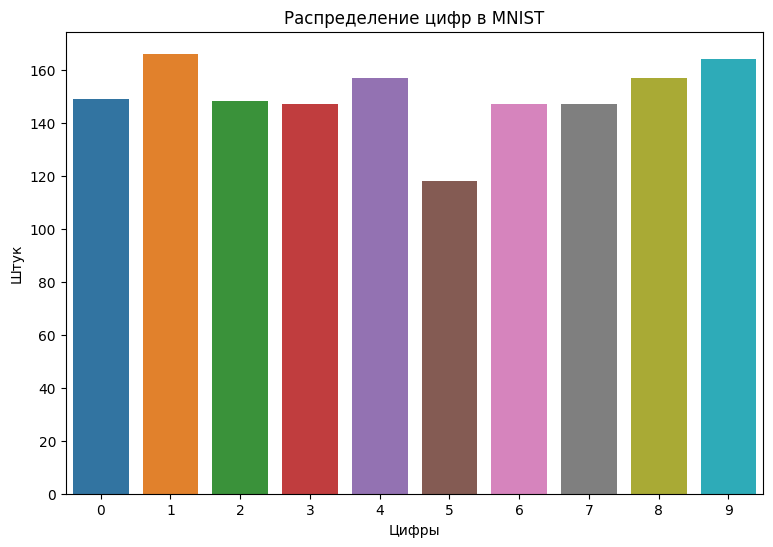

In [ ]:
sns.countplot(x=y_viz.numpy());
plt.xlabel('Цифры')
plt.ylabel('Штук')
plt.title("Распределение цифр в MNIST");

## Предобработка данных
После сжатия выше, наши цифры для обучения представляют собой NumPy массив размера (1500, 28, 28), т.е. 1500 картинок размером 28х28. Так как мы используем полносвязанную сеть, то данные мы должны подать в виде одной прямой (преобразовать в 1d).

В качестве примера продемонстрируем развёртывание 2d картинки 5x5 в 1d картинку 1х25:

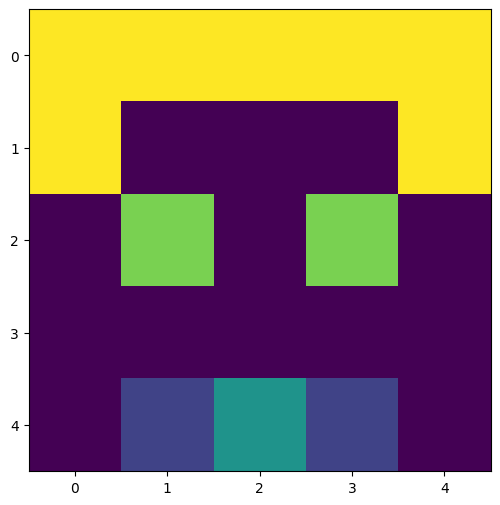

In [3]:
import numpy as np
face = np.array([
                [250, 250, 250, 250, 250],
                [250,   0,   0,   0, 250],
                [0,   200,   0, 200,   0],
                [0,     0,   0,   0,   0],
                [0,    50, 128,  50,   0],
               ])
plt.imshow(face)

Делаем изменение формы $(5, 5) → (1, 25)$:

In [9]:
# изменяет форму данных, число элементов должно в начальной и конечной форме 
# совпадать 5 х 5 = 1 х 25
qwe = tf.reshape(face, shape = (1, 25))
print(qwe)

tf.Tensor(
[[250 250 250 250 250 250   0   0   0 250   0 200   0 200   0   0   0   0
    0   0   0  50 128  50   0]], shape=(1, 25), dtype=int64)


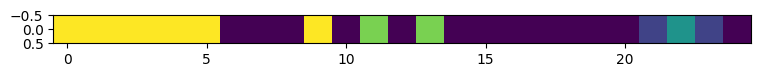

In [10]:
plt.imshow(qwe)

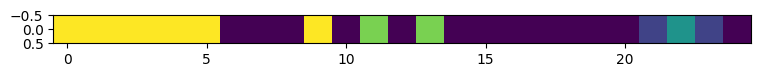

In [13]:
qwe2 = qwe / 10
plt.imshow(qwe2)

Для начала мы меняем форму данных $(1500, 28, 28) → (1500, 784)$. Фактически каждую картинку вытянем в одну строчку, как в примере выше. Затем изменим масштаб данных таким образом, чтобы значения пикселей $[0,255]$ соответствовали диапазону $[0,1]$. Этот шаг гарантирует, что входные пиксели имеют одинаковое распределение, что обеспечивает лучшую  сходимость. Функции активации работают со значениями в диапазоне $[0,1]$ или $[-1,1]$.

In [ ]:
# Функция изменения формы и масштабирования данных
def preprocess(x, y):
  # reshap - изменяет форму данных
  x = tf.reshape(x, shape=(-1, 784)) # -1 - значит сохранить форму для заданного индекса матрицы, равносильно указать 1500
  # Масштабируем данные
  x = x/255
  return x, y

train_data, val_data = train_data.map(preprocess), val_data.map(preprocess) # map выполняет функцию preprocess для каждого элемента данных, к которым применяется

## Построение модели MLP

Начнем с визуализации функций активации **ReLU** и **Softmax**. Обе функции доступны в TensorFlow: `tf.nn.relu` и `tf.nn.softmax`, соответственно. **ReLU** - это нелинейная функция активации, которая пропускает входные данные, если они положительные, и выдает 0 в противном случае:

$$\text{ReLU}(X) = max(0, X)$$

Text(0.5, 1.0, 'Функция активации ReLU')

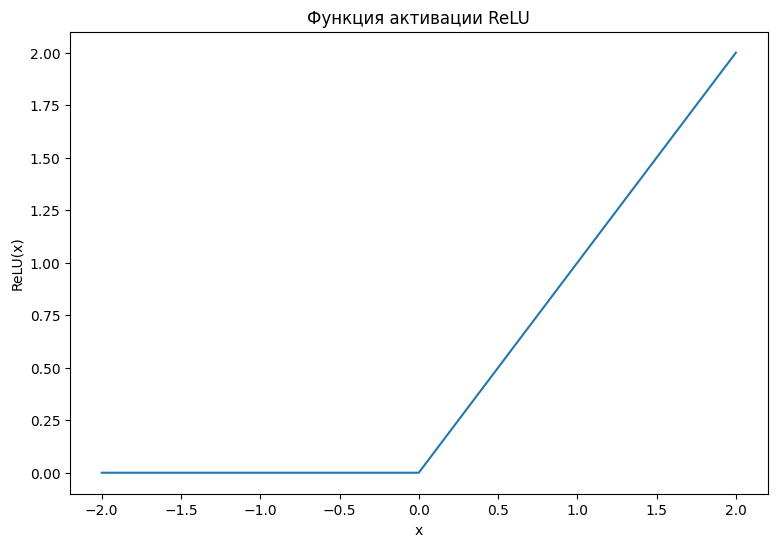

In [ ]:
x = tf.linspace(-2, 2, 201) # Тензорный вариант для linspace
x = tf.cast(x, tf.float32) # Приведение тензора к нужному типу, в данном случае к 32-х разрядному числу с плавающей точкой
plt.plot(x, tf.nn.relu(x))
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('Функция активации ReLU')

Функция активации **softmax** - это нормализованная экспоненциальная функция, которая преобразует $m$ действительных чисел в распределение вероятностей с $m$ исходами /классами. Это полезно для прогнозирования вероятностей классов на основе выходных данных нейронной сети:

$$\text{Softmax}(X) = \frac{e^{X}}{\sum_{i=1}^{m}e^{X_i}}$$

Text(0.5, 1.0, 'Функция активации Softmax')

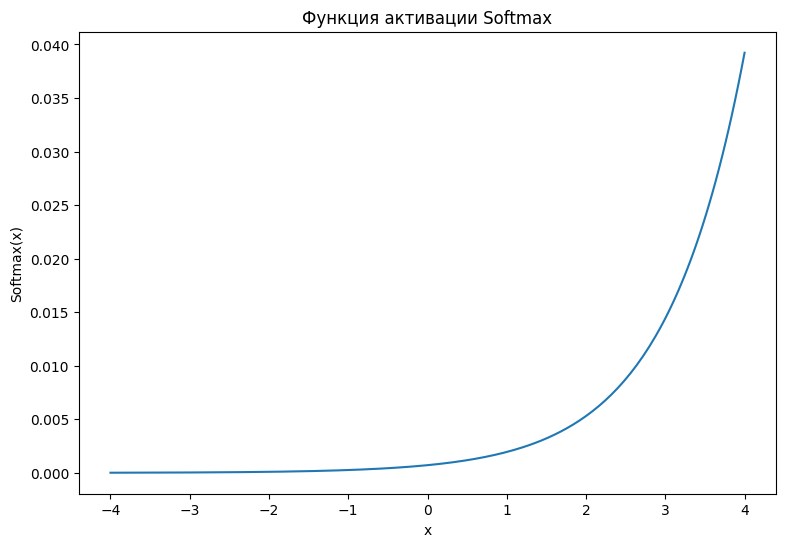

In [ ]:
x = tf.linspace(-4, 4, 201)
x = tf.cast(x, tf.float32)
plt.plot(x, tf.nn.softmax(x, axis=0)) # указываем ось (axis), индекс тензора, по которому проводим вычисления
plt.xlabel('x')
plt.ylabel('Softmax(x)')
plt.title('Функция активации Softmax')

### Полносвязанный слой

Создадим класс для полносвязанного слоя. Не пугайтесь, в Keras подобные классы уже есть и нам не надо изобретать их заново. Однако, сейчас, в учебных целях мы "обретем велосипед" снова.

По определению, выходы одного слоя полностью подключены к входам следующего слоя в MLP. Следовательно, входной размер для плотного слоя может быть определен на основе выходного размера его предыдущего слоя, и его не нужно указывать заранее во время его инициализации. Веса также должны быть инициализированы должным образом, чтобы выходные данные активации не становились слишком большими или малыми. Одним из наиболее популярных методов инициализации веса является схема Ксавье, где каждый элемент весовой матрицы выбирается следующим образом:

$$W_{ij} \sim \text{Uniform}(-\frac{\sqrt{6}}{\sqrt{n + m}},\frac{\sqrt{6}}{\sqrt{n + m}})$$

Вектор смещения может быть инициализирован нулями.

In [ ]:
def xavier_init(shape):
  # Вычисляем значения инициализации xavier для весовой матрицы
  in_dim, out_dim = shape

  # Задаем диапазон инициализации весов по схеме Ксавье
  xavier_lim = tf.sqrt(6.)/tf.sqrt(tf.cast(in_dim + out_dim, tf.float32))

  # Возвращаем тензор с равномерно распределенными случайными величинами в указанном интервале.
  weight_vals = tf.random.uniform(shape=(in_dim, out_dim),
                                  minval=-xavier_lim, maxval=xavier_lim)
  return weight_vals

Функция инициализации Ксавье также может быть реализована с помощью встроенного метода `tf.keras.initializers.GlorotUniform`.

Вернемся к классу полносвязанного слоя. Класс наследуется от `tf.Module`. Все что нам сейчас надо знать про наследование, так это только то, что в нашем родительском классе (`tf.Module`) реализован дополнительный функционал для реализации модели. Наш класс содержит 2 метода: `__init__` - начальная инициализация переменных и `__call__`, так называемый магический метод, который превратит наш класс в функтор. Это значит, что класс можно после инициализации вызывать, как обычную функцию.

In [ ]:
class DenseLayer(tf.Module):

  def __init__(self, out_dim, weight_init=xavier_init, activation=tf.identity):
    # Инициализация размеров и функции активации
    self.out_dim = out_dim # Определяем размерность выходов
    self.weight_init = weight_init # Инициализируем веса
    self.activation = activation # Задаем функцию активации
    self.built = False

  @tf.function # Декоратор, который переносит вычисления на уровень графа TensorFlow
  def __call__(self, x):
    if not self.built: # Если запущен первый раз проводим инициализацию
      # Вывод входного измерения на основе первого вызова
      self.in_dim = x.shape[1]
      # Инициализация весов и смещений
      self.w = tf.Variable(self.weight_init(shape=(self.in_dim, self.out_dim))) # Объявление тензорных переменных
      self.b = tf.Variable(tf.zeros(shape=(self.out_dim,))) # Объявление тензорных переменных
      self.built = True # Инициализация пройдена
    # Вычисление прямого прохода
    y = tf.add(tf.matmul(x, self.w), self.b)  # уравнение персептрона
    return self.activation(y) # Применение функции активации к уравнению персептрона

Создавая модель глубокого обучения в TensorFlow, мы используем переменные для представления параметров модели. Переменные TensorFlow — буферы в оперативной памяти, содержащие тензоры. Однако, в отличие от нормальных тензоров, которые создаются только при запуске графа и затем тут же стираются из памяти, переменные переживают несколько выполнений графа.

Поэтому они обладают следующими тремя свойствами:
* Переменные должны быть явно инициализированы до того, как граф будет использован впервые.
* Можно использовать градиентные методы модификации переменных после каждой итерации, ведь мы ищем оптимальные параметры модели.
* Значения, хранимые в переменных, можно скопировать на диск и восстанавливать для дальнейшего использования.

Эти три свойства делают TensorFlow особенно полезным инструментом в разработке моделей машинного обучения.

Создание переменных — процесс несложный, и в TensorFlow можно инициализировать их несколькими способами.

Начнем с переменной, которая описывает веса, соединяющие нейроны двух слоев сети с прямым распространением сигнала:

```
self.w = tf.Variable(self.weight_init(shape=(self.in_dim, self.out_dim)))
```

Здесь мы передаем tf.Variable результат выполнения функции инициализации весов. Именнованным араметром `name` мы также можем задать имя обращения к tf.Variable, т.е. задать уникальный идентификатор, который позволяет обращаться к соответствующему узлу в графе вычислений. В этом случае
веса считаются обучаемыми; мы будем автоматически вычислять градиенты и применять их к весам. Если они не должны быть обучаемыми, мы
можем установить дополнительный флаг при обращении к tf.Variable: `trainable=False`.

Наиболее часто для инициализации переменных в TensorFlow используются методы:
* ```tf.zeros(shape, dtype=tf.float32, name=None)```
* ```tf.ones(shape, dtype=tf.float32, name=None)```
* ```tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None,
 name=None)```
* ```tf.truncated_normal(shape, mean=0.0, stddev=1.0,  dtype=tf.float32, seed=None, name=None)```
* ```tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)```

При обращении к tf.Variable к графу вычислений добавляются три операции:
— операция, создающая тензор для инициализации переменной;
— операция tf.assign, которая наполняет переменную инициализирующим тензором до ее использования;
— операция переменной, которая содержит ее текущее значение.

В TensorFlow `tf.Module` — это класс, который позволяет вам управлять объектами `tf.Variable` и объектами `tf.function`.

Это облегчает две важные функции:
* Cохранение и восстановление переменных. Вы можете сохранять и восстанавливать значения переменных с помощью tf.train.Checkpoint. Это особенно полезно во время обучения для эффективного сохранения и восстановления состояния модели.
* Импорт и экспорт. С помощью tf.saved_model вы можете импортировать и экспортировать значения tf.Variable объектов и связанных с ними tf.function графиков. Это позволяет запускать модель независимо от создавшей ее программы Python, повышая ее переносимость.


Далее, мы создаем класс для модели MLP, который выполняет слои последовательно.
Помните, что переменные модели доступны только после первой последовательности вызовов полносвязанного слоя из-за вывода размеров.

In [ ]:
class MLP(tf.Module):

  def __init__(self, layers):
    self.layers = layers

  @tf.function # Декоратор, который переносит вычисления на уровень графа TensorFlow
  def __call__(self, x, preds=False):
    # Последовательное выполнение слоев модели
    for layer in self.layers:
      x = layer(x)
    return x

Инициализируем модель MLP со следующей архитектурой:

$$
Вход → ReLU(784, 700) → ReLU(700, 500) → Softmax(500, 10) → Выход
$$

Функция активации softmax не обязательно должна применяться MLP. Она вычисляется отдельно в функциях потерь и прогнозирования.


In [ ]:
hidden_layer_1_size = 700
hidden_layer_2_size = 500
output_size = 10

# Создание модели нейронной сети
mlp_model = MLP([
    DenseLayer(out_dim=hidden_layer_1_size, activation=tf.nn.relu),
    DenseLayer(out_dim=hidden_layer_2_size, activation=tf.nn.relu),
    DenseLayer(out_dim=output_size)])

### Определение функции потерь

Функция потерь перекрестной энтропии является отличным выбором для задач многоклассовой классификации, поскольку она измеряет отрицательную логарифмическую вероятность данных в соответствии с вероятностными прогнозами модели. Чем выше вероятность, присвоенная истинному классу, тем меньше потери. Уравнение для потери перекрестной энтропии выглядит следующим образом:

$$L = -\frac{1}{n}\sum_{i=1}^{n}\sum_{i=j}^{n} {y_j}^{[i]}⋅\log(\hat{{y_j}}^{[i]})$$

где

* $\underset{n\times m}{\hat{y}}$: матрица прогнозируемых распределений классов
* $\underset{n\times m}{y}$: матрица истинных классов в формате `one-hot-encoded`.

Для вычисления функции потери перекрестной энтропии можно использовать готовую функцию: `tf.nn.sparse_softmax_cross_entropy_with_logits`. Эта функция не требует, чтобы последний слой модели применял функцию активации softmax, и не требует, чтобы метки классов были в формате `one-hot-encoded`.

In [ ]:
def cross_entropy_loss(y_pred, y):
  # Вычисление перекрестной энтропии с помощью разреженной операции
  sparse_ce = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=y_pred)
  return tf.reduce_mean(sparse_ce) # аналог np.mean для тензоров

Напишем базовую функцию вычисления точности, которая определяет долю правильных классификаций во время обучения. Чтобы сгенерировать прогнозы класса из выходных данных softmax, верните индекс, соответствующий наибольшей вероятности класса.

In [ ]:
def accuracy(y_pred, y):
  # Вычисляем точность после извлечения предсказаний класса
  class_preds = tf.argmax(tf.nn.softmax(y_pred), axis=1) # возвращает индекс максимального элемента
  is_equal = tf.equal(y, class_preds) # сравнение тензорных значений
  return tf.reduce_mean(tf.cast(is_equal, tf.float32)) # аналог np.mean для тензоров

### Обучение модели

В процессе обучения мы стараемся минимизировать функцию потерь и обновляем параметры для повышения точности. Параметры нейронной сети — это обычно веса связей. В процессе обучения веса обновляются. Оптимизатор — это метод достижения лучших значений весов в процессе обучения.

Базовый набор различных используемых в глубоком обучении оптимизаторов:
* Стохастический градиентный спуск (SGD).
* Оптимизатор импульса (Momentum).
* Среднеквадратичное распространение (RMSProp).
* Адаптивная оценка момента (Adam).

Adam — один из самых эффективных алгоритмов оптимизации в обучении нейронных сетей. Он сочетает в себе идеи RMSProp и оптимизатора импульса. Вместо того чтобы адаптировать скорость обучения параметров на основе среднего первого момента (среднего значения), как в RMSProp, Adam также использует среднее значение вторых моментов градиентов. В частности, алгоритм вычисляет экспоненциальное скользящее среднее градиента и квадратичный градиент, а параметры beta1 и beta2 управляют скоростью затухания этих скользящих средних.

**Его преимущества:**

* Простая реализация.
* Вычислительная эффективность.
* Небольшие требования к памяти.
* Инвариант к диагональному масштабированию градиентов.
* Хорошо подходит для больших с точки зрения данных и параметров задач.
* Подходит для нестационарных целей.
* Подходит для задач с очень шумными или разреженными градиентами.
* Гиперпараметры имеют наглядную интерпретацию и обычно требуют небольшой настройки.

Прежде чем перейти к реализации, давайте сделаем краткий обзор алгоритма оптимизации Adam. Adam расшифровывается как Adaptive Moment Estimation. Он поддерживает две переменные скользящего среднего:

* v – первый момент градиента (импульс)
* s – второй момент градиента (дисперсия неопределенности)

Алгоритм вычисляет экспоненциально взвешенное среднее значение прошлых градиентов и их квадратов градиентов. Затем эти скользящие средние используются для обновления параметров модели.

Алгоритм Adam состоит из следующих шагов:
* **Инициализация переменных**: алгоритм начинается с инициализации переменных скользящего среднего **v** и **s** в качестве словарей для хранения экспоненциально взвешенных средних значений градиентов и квадратов градиентов соответственно.

* **Вычисление скользящие средних:** для каждого параметра модели алгоритм вычисляет скользящее среднее градиентов путем объединения текущего градиента с предыдущим скользящим средним. Он также вычисляет скользящее среднее квадратов градиентов.

* **Коррекция смещения:** чтобы уменьшить смещение во время начальных итераций, Adam выполняет коррекцию смещения путем деления скользящих средних на поправочный коэффициент.

* **Обновление параметров:** Наконец, алгоритм обновляет параметры модели, используя скользящие средние градиентов и квадраты градиентов.


Одним из ключевых компонентов Adam является то, что он использует экспоненциально взвешенные скользящие средние для получения оценки как импульса, так и второго момента градиента. То есть он использует переменные состояния:

$$
\mathbf{v}_t ← β_1 \mathbf{v}_{t-1} + (1-β_1)\mathbf{g}_t
$$

$$
\mathbf{s}_t ← β_2 \mathbf{s}_{t-1} + (1-β_2)\mathbf{g}_t^2
$$

Здесь $β_1$ и $β_2$ являются неотрицательными весовыми параметрами. Обычными значениями для них являются $β_1 = 0.9$ и $β_2 = 0.999$. То есть оценка дисперсии перемещается намного медленнее, чем значение импульса. Обратите внимание, что при инициализации $\mathbf{v}_0 = \mathbf{s}_0 = 0$ мы изначально имеем значительное смещение в сторону меньших значений. Это можно решить, используя тот факт, что

$$
∑_{i=0}^{t-1} β^i = \frac {1-β^t}{1-β}
$$
  
для повторной нормализации терминов. Соответственно, нормализованные переменные состояния задаются с помощью

$$
\hat{\mathbf{v}_t} = \frac {\mathbf{v}_t}{1-β_1^t}, \hat{\mathbf{s}_t} = \frac {\mathbf{s}_t}{1-β_2^t}
$$

Вооружившись надлежащими оценками, мы теперь можем записать уравнения обновления. Сначала мы изменяем масштаб градиента способом, очень похожим на RMSProp, чтобы получить

$$
\mathbf{g}_t' = \frac{\eta\hat{\mathbf{v}_t}}{\sqrt{\hat{\mathbf{s}_t}}+ϵ}
$$

В отличие от RMSProp, в нашем обновлении используется импульс $\mathbf{v}_t$, а не сам градиент. Кроме того, есть небольшая косметическая разница, поскольку масштабирование происходит с использованием $\frac{1}{\sqrt{\hat{\mathbf{s}_t}}+ϵ}$ вместо $\frac{1}{\sqrt{\hat{\mathbf{s}_t}+ϵ}}$. Первое, возможно, работает немного лучше на практике, отсюда и отклонение от RMSProp. Обычно мы выбираем $ϵ = 10^{-6}$, что обеспечивает хороший компромисс между числовой стабильностью и точностью.

Теперь у нас есть все необходимое для вычисления обновлений:

$$
\mathbf{x}_t \leftarrow \mathbf{x}_{t-1} - \mathbf{g}_t'
$$


Более подробно с алгоритмом оптимизации Adam можно познакомиться [тут](https://d2l.ai/chapter_optimization/adam.html).

In [ ]:
class Adam:

    def __init__(self, learning_rate=1e-3, beta_1=0.9, beta_2=0.999, ep=1e-7):
      # Инициализируем параметры оптимизатора и резервируем переменные
      self.beta_1 = beta_1 # гиперпараметр
      self.beta_2 = beta_2 # гиперпараметр
      self.learning_rate = learning_rate # шаг обучения
      self.ep = ep # Эпсилон - предотвращает деление на ноль, слабо влияет на обучение
      self.t = 1.
      self.v_dvar, self.s_dvar = [], []
      self.built = False

    def apply_gradients(self, grads, vars):
      # Инициализируем переменные при первом вызове
      if not self.built:
        for var in vars:
          v = tf.Variable(tf.zeros(shape=var.shape))
          s = tf.Variable(tf.zeros(shape=var.shape))
          self.v_dvar.append(v)
          self.s_dvar.append(s)
        self.built = True
      # Обновите переменные модели с учетом их градиентов
      for i, (d_var, var) in enumerate(zip(grads, vars)):
        self.v_dvar[i].assign(self.beta_1*self.v_dvar[i] + (1-self.beta_1)*d_var)
        self.s_dvar[i].assign(self.beta_2*self.s_dvar[i] + (1-self.beta_2)*tf.square(d_var))
        v_dvar_bc = self.v_dvar[i]/(1-(self.beta_1**self.t))
        s_dvar_bc = self.s_dvar[i]/(1-(self.beta_2**self.t))
        var.assign_sub(self.learning_rate*(v_dvar_bc/(tf.sqrt(s_dvar_bc) + self.ep)))
      self.t += 1.
      return

Теперь напишем пользовательский цикл обучения, который обновляет параметры MLP с помощью мини-пакетного градиентного спуска. Использование мини-пакетов для обучения обеспечивает как эффективность использования памяти, так и более быструю сходимость.

Для понимания как происходит обучение, приведем пример вычисления градиентов в TensorFlow на простом примере. Допустим, мы хотим вычислить производную функции $y = x^2$ в точке $x = -2$. Для этого мы создадим переменную со значением -2.0 (указание вещественной величины здесь обязательно) и выполним прямой проход по графу вычислений для заданной функции, используя специальный объект GradientTape:  

In [ ]:
x = tf.Variable(-2.0)

with tf.GradientTape() as tape:
    y = x ** 2

df = tape.gradient(y, x)
print(df)

tf.Tensor(-4.0, shape=(), dtype=float32)


Когда мы запускаем менеджер контекста (оператор with) для объекта **GradientTape()**, то для функции, записанной в виде `y = x ** 2`, сохраняются все необходимые вычисления (для дальнейшего нахождения производных) в объекте **tape**.После этого вызывается метод **gradient()**, который реализует вычисление частных производных методом обратного распространения (при обратном проходе по графу). Здесь первым параметром мы указываем саму функцию $y$, а вторым – аргументы, от которых вычисляются производные. В данном случае указан один аргумент $x$. Результат вычисления представлен выше.


Может показаться, что городить такой огород для вычисления производных – это верх расточительства ресурсов компьютера. В конце концов, ее и подобные ей производные можно посчитать вручную и просто реализовать в виде функции. Все верно, для таких простых ситуаций именно так и следует поступать. Однако, в задачах машинного обучения часто имеют дело с функциями, зависящими от огромного числа аргументов (тысячи и миллионы). В этих условиях напрямую производить вычисления, например, через якобиан – неэффективное решение, а иногда и непреодолимое из-за отсутствия достаточного объема памяти. А вот с помощью вычислительного графа такие задачи решаются и относительно просто.

In [ ]:
def train_step(x_batch, y_batch, loss, acc, model, optimizer):
  # Обновляем состояние модели с учетом пакета данных
  with tf.GradientTape() as tape:
    y_pred = model(x_batch) # Предсказываем значение с текущими весами
    batch_loss = loss(y_pred, y_batch) # Оцениваем ошибку на текущих весах
  batch_acc = acc(y_pred, y_batch) # Оцениваем точность на текущих весах
  grads = tape.gradient(batch_loss, model.variables) # Вычисляем градиенты
  optimizer.apply_gradients(grads, model.variables) # Обновляем переменные с учетом полученных градиентов
  return batch_loss, batch_acc # Возвращаем ошибку и точность на основе заданного пакета

def val_step(x_batch, y_batch, loss, acc, model):
  # Оцениваем модель на основе заданного пакета валидационных данных без обучения на текущих весах
  y_pred = model(x_batch)
  batch_loss = loss(y_pred, y_batch)
  batch_acc = acc(y_pred, y_batch)
  return batch_loss, batch_acc

In [ ]:
def train_model(mlp, train_data, val_data, loss, acc, optimizer, epochs):
  # Инициализация структур данных
  train_losses, train_accs = [], []
  val_losses, val_accs = [], []

  # Отформатируем тренировочный цикл и начнем обучение
  for epoch in range(epochs):
    batch_losses_train, batch_accs_train = [], []
    batch_losses_val, batch_accs_val = [], []

    # Выполняем итерацию по обучающим данным
    for x_batch, y_batch in train_data:
      # Вычисляем градиенты и обновляем параметры модели
      batch_loss, batch_acc = train_step(x_batch, y_batch, loss, acc, mlp, optimizer)
      # Следим за результатами обучения на пакетном уровне
      batch_losses_train.append(batch_loss)
      batch_accs_train.append(batch_acc)

    # Повторяем процедуру проверки данных
    for x_batch, y_batch in val_data:
      batch_loss, batch_acc = val_step(x_batch, y_batch, loss, acc, mlp)
      batch_losses_val.append(batch_loss)
      batch_accs_val.append(batch_acc)

    # Следим за производительностью модели на уровне эпохи
    train_loss, train_acc = tf.reduce_mean(batch_losses_train), tf.reduce_mean(batch_accs_train)
    val_loss, val_acc = tf.reduce_mean(batch_losses_val), tf.reduce_mean(batch_accs_val)
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f"Эпоха: {epoch}")
    print(f"Обучающая ошибка: {train_loss:.3f}, Обучающая точность: {train_acc:.3f}")
    print(f"Валидационная ошибка: {val_loss:.3f}, Валидационная точность: {val_acc:.3f}")
  return train_losses, train_accs, val_losses, val_accs

Тренируйте модель MLP в течение 10 эпох с размером пакета 128. Аппаратные ускорители, такие как графические процессоры, также могут помочь ускорить время обучения.

In [ ]:
train_losses, train_accs, val_losses, val_accs = train_model(mlp_model, train_data, val_data,
                                                             loss=cross_entropy_loss, acc=accuracy,
                                                             optimizer=Adam(), epochs=10)

Эпоха: 0
Обучающая ошибка: 0.225, Обучающая точность: 0.935
Валидационная ошибка: 0.121, Валидационная точность: 0.965
Эпоха: 1
Обучающая ошибка: 0.080, Обучающая точность: 0.975
Валидационная ошибка: 0.094, Валидационная точность: 0.972
Эпоха: 2
Обучающая ошибка: 0.048, Обучающая точность: 0.985
Валидационная ошибка: 0.090, Валидационная точность: 0.974
Эпоха: 3
Обучающая ошибка: 0.033, Обучающая точность: 0.990
Валидационная ошибка: 0.103, Валидационная точность: 0.973
Эпоха: 4
Обучающая ошибка: 0.026, Обучающая точность: 0.992
Валидационная ошибка: 0.087, Валидационная точность: 0.978
Эпоха: 5
Обучающая ошибка: 0.021, Обучающая точность: 0.993
Валидационная ошибка: 0.110, Валидационная точность: 0.973
Эпоха: 6
Обучающая ошибка: 0.019, Обучающая точность: 0.993
Валидационная ошибка: 0.103, Валидационная точность: 0.976
Эпоха: 7
Обучающая ошибка: 0.020, Обучающая точность: 0.993
Валидационная ошибка: 0.100, Валидационная точность: 0.978
Эпоха: 8
Обучающая ошибка: 0.014, Обучающая точн

### Оценка производительности

Начнем с написания функции построения графика, чтобы визуализировать потери и точность модели во время обучения.

In [ ]:
def plot_metrics(train_metric, val_metric, metric_type):
  # Визуализация метрик в зависимости от эпох обучения
  plt.figure()
  plt.plot(range(len(train_metric)), train_metric, label = f"{metric_type} на обучающей выборке")
  plt.plot(range(len(val_metric)), val_metric, label = f"{metric_type} на валидационной выборке")
  plt.xlabel("Эпохи")
  plt.ylabel(metric_type)
  plt.legend()
  plt.title(f"{metric_type} от эпохи");

In [ ]:
train_losses, train_accs, val_losses, val_accs = train_model(mlp_model, train_data, val_data,
                                                             loss=cross_entropy_loss, acc=accuracy,
                                                             optimizer=Adam(), epochs=10)

Эпоха: 0
Обучающая ошибка: 0.225, Обучающая точность: 0.935
Валидационная ошибка: 0.121, Валидационная точность: 0.965
Эпоха: 1
Обучающая ошибка: 0.080, Обучающая точность: 0.975
Валидационная ошибка: 0.094, Валидационная точность: 0.972
Эпоха: 2
Обучающая ошибка: 0.048, Обучающая точность: 0.985
Валидационная ошибка: 0.090, Валидационная точность: 0.974
Эпоха: 3
Обучающая ошибка: 0.033, Обучающая точность: 0.990
Валидационная ошибка: 0.103, Валидационная точность: 0.973
Эпоха: 4
Обучающая ошибка: 0.026, Обучающая точность: 0.992
Валидационная ошибка: 0.087, Валидационная точность: 0.978
Эпоха: 5
Обучающая ошибка: 0.021, Обучающая точность: 0.993
Валидационная ошибка: 0.110, Валидационная точность: 0.973
Эпоха: 6
Обучающая ошибка: 0.019, Обучающая точность: 0.993
Валидационная ошибка: 0.103, Валидационная точность: 0.976
Эпоха: 7
Обучающая ошибка: 0.020, Обучающая точность: 0.993
Валидационная ошибка: 0.100, Валидационная точность: 0.978
Эпоха: 8
Обучающая ошибка: 0.014, Обучающая точн

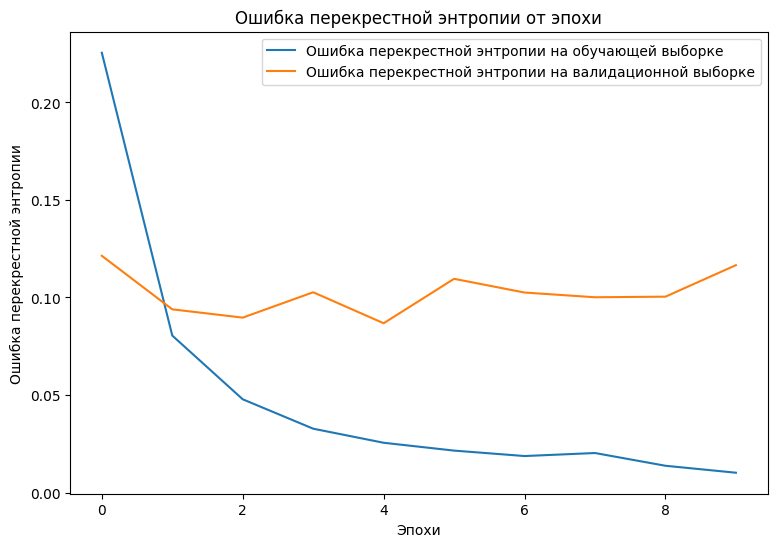

In [ ]:
plot_metrics(train_losses, val_losses, "Ошибка перекрестной энтропии")

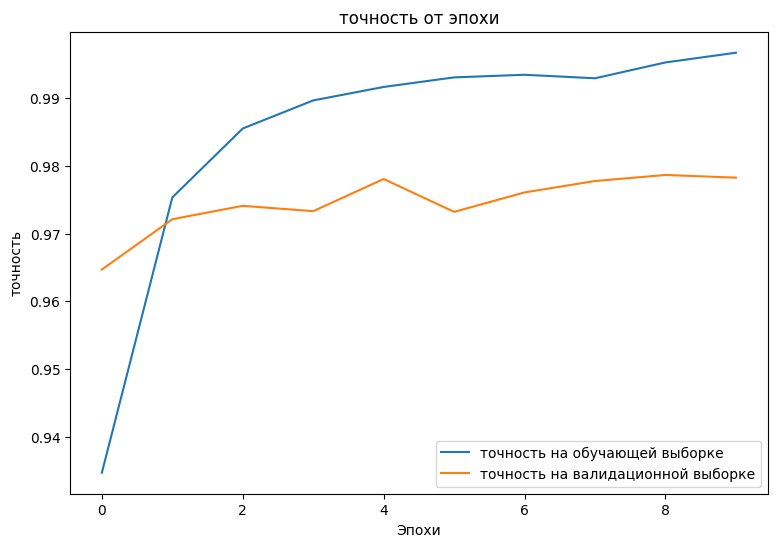

In [ ]:
plot_metrics(train_accs, val_accs, "точность")

## Сохранение и загрузка модели

Создадим модуль экспорта, который принимает необработанные данные и выполняет следующие операции:
- Предобработка данных
- Прогнозирование вероятности
- Прогнозирование класса


In [ ]:
class ExportModule(tf.Module):
  def __init__(self, model, preprocess, class_pred):
    # Инициализация функций предобработки и постобработки
    self.model = model
    self.preprocess = preprocess
    self.class_pred = class_pred

  @tf.function(input_signature=[tf.TensorSpec(shape=[None, None, None, None], dtype=tf.uint8)])
  def __call__(self, x):
    # Запускаем модуль экспорта для получения новых точек данных
    x = self.preprocess(x)
    y = self.model(x)
    y = self.class_pred(y)
    return y

In [ ]:
def preprocess_test(x):
  # Модуль экспорта принимает необработанные и немаркированные данные
  x = tf.reshape(x, shape=[-1, 784])
  x = x/255
  return x

def class_pred_test(y):
  # Сгенерируем прогнозы классов на основе выходных данных MLP
  return tf.argmax(tf.nn.softmax(y), axis=1)

Модуль экспорта теперь можно сохранить с помощью функции `tf.saved_model.save`.

In [ ]:
mlp_model_export = ExportModule(model=mlp_model,
                                preprocess=preprocess_test,
                                class_pred=class_pred_test)

In [ ]:
models = tempfile.mkdtemp()
save_path = os.path.join(models, 'mlp_model_export')
tf.saved_model.save(mlp_model_export, save_path)

Загрузим сохраненную модель с помощью `tf.saved_model.load` и проверим ее производительность на невидимых ранее моделью тестовых данных.


In [ ]:
mlp_loaded = tf.saved_model.load(save_path)

In [ ]:
def accuracy_score(y_pred, y):
  # Общая функция точности
  is_equal = tf.equal(y_pred, y)
  return tf.reduce_mean(tf.cast(is_equal, tf.float32))

x_test, y_test = tfds.load("mnist", split=['test'], batch_size=-1, as_supervised=True)[0]
test_classes = mlp_loaded(x_test)
test_acc = accuracy_score(test_classes, y_test)
print(f"Точность на тестовой выборке: {test_acc:.3f}")

Точность на тестовой выборке: 0.977


Модель отлично справляется с классификацией написанных от руки цифр в обучающем наборе данных, а также хорошо обобщает невидимые ранее данные. Теперь проверим точность модели по классам, чтобы обеспечить хорошую производительность для каждой цифры.

In [ ]:
print("Точность с разбивкой по цифрам :")
print("---------------------------")
label_accs = {}
for label in range(10):
  label_ind = (y_test == label)
  # extract predictions for specific true label
  pred_label = test_classes[label_ind]
  labels = y_test[label_ind]
  # compute class-wise accuracy
  label_accs[accuracy_score(pred_label, labels).numpy()] = label
for key in sorted(label_accs):
  print(f"Цифра {label_accs[key]}: {key:.3f}")

Точность с разбивкой по цифрам :
---------------------------
Цифра 2: 0.965
Цифра 0: 0.970
Цифра 4: 0.970
Цифра 9: 0.972
Цифра 5: 0.974
Цифра 7: 0.977
Цифра 6: 0.983
Цифра 8: 0.986
Цифра 3: 0.987
Цифра 1: 0.988


Похоже, что модель испытывает трудности с некоторыми цифрами немного больше, чем с другими, что довольно часто встречается во многих задачах многоклассовой классификации. В качестве заключительного упражнения построим матрицу ошибок предсказаний модели и соответствующих ей истинных меток, чтобы получить больше информации на уровне класса. В Sklearn и seaborn есть функции для генерации и визуализации матриц ошибок.

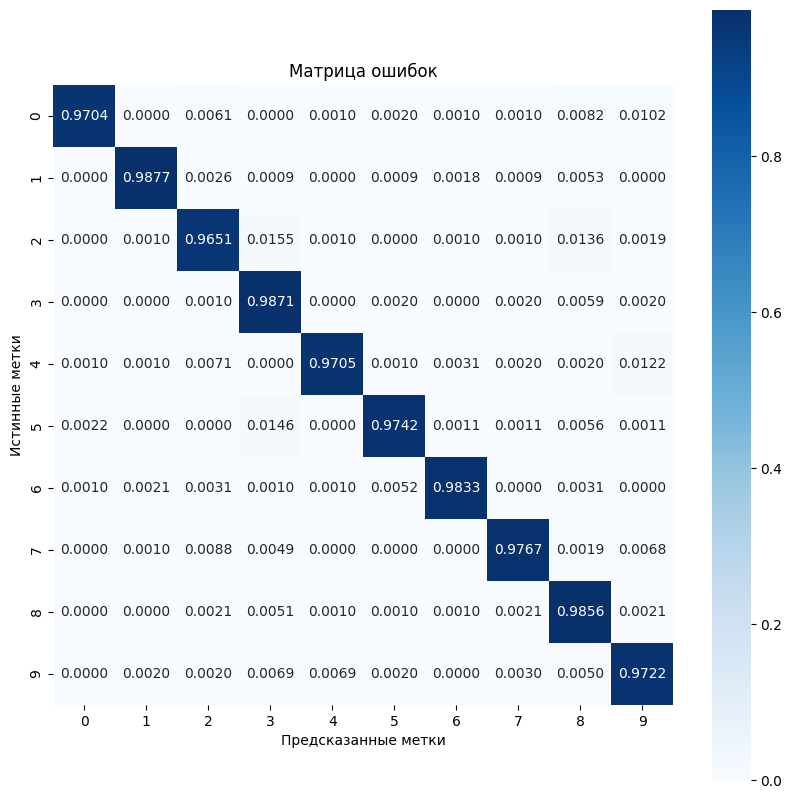

In [ ]:
import sklearn.metrics as sk_metrics

def show_confusion_matrix(test_labels, test_classes):
  # Вычисление матрицы ошибок и ее нормализация
  plt.figure(figsize=(10,10))
  confusion = sk_metrics.confusion_matrix(test_labels.numpy(),
                                          test_classes.numpy())
  confusion_normalized = confusion / confusion.sum(axis=1, keepdims=True)
  axis_labels = range(10)
  ax = sns.heatmap(
      confusion_normalized, xticklabels=axis_labels, yticklabels=axis_labels,
      cmap='Blues', annot=True, fmt='.4f', square=True)
  plt.title("Матрица ошибок")
  plt.ylabel("Истинные метки")
  plt.xlabel("Предсказанные метки")

show_confusion_matrix(y_test, test_classes)

Анализ на уровне класса может помочь выявить причины неправильной классификации и улучшить производительность модели в будущих циклах обучения.

Таким образом мы поэтапно на низком уровне библиотеки TensorFlow прошлись по всему процессу обучения. Все функции, мы максимально попытались написать самостоятельно, а главное подробно. На последующих уроках, мы будем брать готовые функции высокоуровневого API Keras. Если вы чего-то не поняли из текущего урока - ничего страшного. Это один из самых сложных уроков курса, попробуйте к нему вернуться позже. Однако, без него ваши знания были бы не полными. А дотошные работодатели любят задавать на собеседованиях каверзные вопросы этого урока.  

На этом практическая часть урока завершена. Пора переходить к [домашей работе](https://colab.research.google.com/drive/1bSAFxhE4EAEBkSDUABYwbOMK0FqwimqX).